In [18]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd

In [20]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# Mod 9.1.5

In [23]:
# set up the ability to query a SQLite database.
engine = create_engine("sqlite:///hawaii.sqlite")

In [24]:
# Automap Base creates a base class for an automap schema 
# in SQLAlchemy. Basically, it sets up a foundation for us 
# to build on in SQLAlchemy, and by adding it to our code, 
# it will help the rest of our code to function properly.
Base = automap_base()

In [25]:
# reflect the schema from the tables to our code.
Base.prepare(engine, reflect=True)

In [26]:
# our data is no longer stored in tables, but 
# rather in classes. The code we will run below 
# enables us to essentially copy, or reflect, 
# our data into different classes instead of database tables.
Base.classes.keys()

['measurement', 'station']

In [27]:
# to reference a specific class, we use Base.classes.<class name>.
# Assign var names.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [28]:
# use an SQLAlchemy Session to query our database. 
# Our session essentially allows us to query for data.
session = Session(engine)

In [29]:
# reflect an existing database into a new model

# reflect the tables


In [30]:
# We can view all of the classes that automap found


In [31]:
# Save references to each table


In [32]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [44]:
# Design a query to retrieve the last 12 months of precipitation 
# data and plot the results. 
# Starting from the last data point in the database. 
# The datetime dependency has a function called dt.date(), 
# which specifies the date in the following format: year, month, day.
# Add the dt.timedelta() function to the previous line of code. 
# This function allows us to trace back a certain number of days. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Use the session.query() function, which is how we'll begin 
# all of our queries in SQLAlchemy. From a bird's-eye view, 
# this is how we query a SQLite database using Python.
# Perform a query to retrieve the data and precipitation scores
# extracts all of the results from our query and put them in a list. 
# To do this, add .all() to the end of our existing query.
# results = session.query(Measurement.date, Measurement.prcp)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)

# Save the query results as a Pandas DataFrame and set the 
# index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
print(df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [43]:

# By setting inplace=True, we're saying that we do not want to 
# create a new DataFrame with the modified specifications. If we 
# set it to "False," then we would create a new DataFrame.
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [46]:
# convert the DataFrame to strings, and then we'll 
# set our index to "False." This will allow us to 
# print the DataFrame without the index.
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [47]:
# Sort the dataframe by date
df = df.sort_index()

In [49]:
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

<AxesSubplot:xlabel='date'>

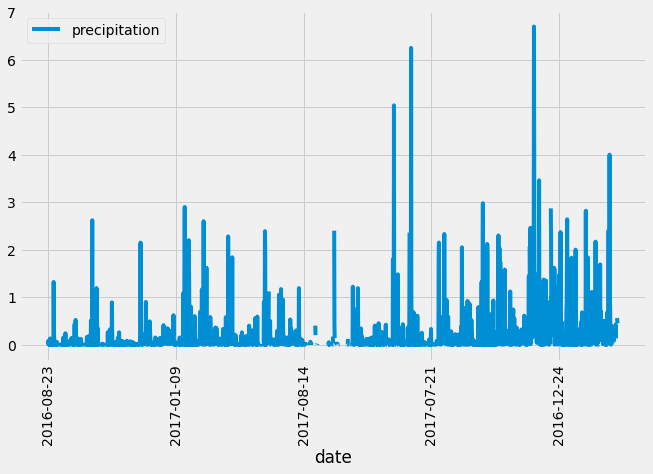

In [59]:
#  Mod 9.2.4
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date", rot=90, y="precipitation", figsize=(10,6))

In [60]:
# Mod 9.2.5
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge